#### **判别分析法**

* **距离判别法**
    距离判别法就是建立待判定对象到A的距离 d(ac, Ai),然后根据距离最近原则进行判别, 即判别函数 W(i, æ) = d(x, A;). 若 W (k, æ) = min{W(i,2)1,2,., r}, x∈ Ak.距离 d(x, A4) 一般采用 Mahalanobis 距离 (马氏距离).
![](./img/Snipaste_2025-07-09_12-00-53.png)

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# 已知样本数据（15个样本，每个样本2个特征）
x0 = np.array([
    [1.24, 1.27], [1.36, 1.74], [1.38, 1.64], [1.38, 1.82], [1.38, 1.90],
    [1.40, 1.70], [1.48, 1.82], [1.54, 1.82], [1.56, 2.08], [1.14, 1.78],
    [1.18, 1.96], [1.20, 1.86], [1.26, 2.00], [1.28, 2.00], [1.30, 1.96]
])

# 待分类样本（3个样本）
x = np.array([
    [1.24, 1.80], [1.28, 1.84], [1.40, 2.04]
])

# 已知样本的类别标签（前9个为类别1，后6个为类别2）
g = np.hstack([np.ones(9), 2 * np.ones(6)])

# 计算协方差矩阵（用于马氏距离）
v = np.cov(x0.T)

# 使用马氏距离的KNN分类器
# 这里的n_neighbors这个参数比较难理解，建议自己去查一下
knn = KNeighborsClassifier(n_neighbors=2, metric='mahalanobis', metric_params={'V': v})
knn.fit(x0, g)
pre = knn.predict(x)
print("马氏距离分类结果:", pre)
print("马氏距离已知样本的误判率:", 1 - knn.score(x0, g))   

# 使用欧氏距离的KNN分类器
knn2 = KNeighborsClassifier(n_neighbors=2)  # 默认metric='euclidean'
knn2.fit(x0, g)
pre2 = knn2.predict(x)
print("欧氏距离分类结果:", pre2)
print("欧氏距离已知样本的误判率:", 1 - knn2.score(x0, g))  

马氏距离分类结果: [2. 2. 1.]
马氏距离已知样本的误判率: 0.0
欧氏距离分类结果: [2. 1. 2.]
欧氏距离已知样本的误判率: 0.0


![](./img/Snipaste_2025-07-09_12-25-07.png)

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
a = pd.read_excel("./10.1心电图数据.xlsx")
b = a.values
 
x0 = b[:-2,1:-1].astype(float)
x = b[-2:,1:-1]
g = b[:-2,-1:].astype(int).ravel()
v = np.cov(x0.T)

# 使用马氏距离的KNN分类器
# 这里的n_neighbors这个参数比较难理解，建议自己去查一下
knn = KNeighborsClassifier(n_neighbors=3, metric='mahalanobis', metric_params={'V': v})
knn.fit(x0, g)
pre = knn.predict(x)
print("马氏距离分类结果:", pre)
print("马氏距离已知样本的误判率:", 1 - knn.score(x0, g))  

马氏距离分类结果: [1 1]
马氏距离已知样本的误判率: 0.15000000000000002


* **Fisher判别法**

In [3]:
# 11.1题  你别管看懂了算法没有,我只能说  会抄
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 已知样本数据（15个样本，每个样本2个特征）
x0 = np.array([
    [1.24, 1.27], [1.36, 1.74], [1.38, 1.64], [1.38, 1.82], [1.38, 1.90],
    [1.40, 1.70], [1.48, 1.82], [1.54, 1.82], [1.56, 2.08], [1.14, 1.78],
    [1.18, 1.96], [1.20, 1.86], [1.26, 2.00], [1.28, 2.00], [1.30, 1.96]
])
# 待分类样本（3个样本）
x = np.array([[1.24, 1.80], [1.28, 1.84], [1.40, 2.04]])
# 已知样本的类别标签（前9个为类别1，后6个为类别2）
g = np.hstack([np.ones(9), 2 * np.ones(6)])

clf = LDA()
clf.fit(x0,g)
print("判别结果为:", clf.predict (x))
print("已知样本的误判率为:",1-clf.score (x0,g))

判别结果为: [2. 2. 2.]
已知样本的误判率为: 0.0


In [4]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
a = pd.read_excel("./10.1心电图数据.xlsx")
b = a.values
x0 = b[:-2,1:-1].astype(float)
x = b[-2:,1:-1]
g = b[:-2,-1:].astype(int).ravel()
clf = LDA()
clf.fit(x0,g)
print("判别结果为:", clf.predict (x))
print("已知样本的误判率为:",1-clf.score (x0,g))

判别结果为: [1 2]
已知样本的误判率为: 0.0


* **贝叶斯判别法**

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
# 已知样本数据（15个样本，每个样本2个特征）
x0 = np.array([
    [1.24, 1.27], [1.36, 1.74], [1.38, 1.64], [1.38, 1.82], [1.38, 1.90],
    [1.40, 1.70], [1.48, 1.82], [1.54, 1.82], [1.56, 2.08], [1.14, 1.78],
    [1.18, 1.96], [1.20, 1.86], [1.26, 2.00], [1.28, 2.00], [1.30, 1.96]
])
# 待分类样本（3个样本）
x = np.array([
    [1.24, 1.80], [1.28, 1.84], [1.40, 2.04]
])
# 已知样本的类别标签（前9个为类别1，后6个为类别2）
g = np.hstack([np.ones(9), 2 * np.ones(6)])

clf = GaussianNB()
clf.fit(x0,g)
print("判别结果为:", clf.predict (x))
print("已知样本的误判率为:",1-clf.score (x0,g))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
a = pd.read_excel("./10.1心电图数据.xlsx")
b = a.values
x0 = b[:-2,1:-1].astype(float)
x = b[-2:,1:-1]
g = b[:-2,-1:].astype(int).ravel()
clf = GaussianNB()
clf.fit(x0,g)
print("判别结果为:", clf.predict (x))
print("已知样本的误判率为:",1-clf.score (x0,g))

* **判别准则的评价**
    * **回代误判率**
    * **交叉误判率**

In [7]:
#线性交叉误判率
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
a = pd.read_excel("./10.1心电图数据.xlsx")
b = a.values
x0 = b[:-2,1:-1].astype(float)
g = b[:-2,-1:].astype(int).ravel()
model = LinearDiscriminantAnalysis()
print(f"准确率为{cross_val_score(model,x0,g,cv=2)}")

准确率为[0.9 0.8]


#### **主成分分析法**
[查看reference](./Method_Reference/PCA.ipynb)
* **主成分的目的是降维, 减少变量的个数,因此一般选取少量的主成分(一般不超过6个),只要累积贡献率超过85%即可**

![](./img/Snipaste_2025-07-09_14-05-08.png)

In [11]:
import numpy as np
from sklearn.decomposition import PCA
# 根据表11.3数据创建NumPy数组
# 列顺序：序号 | 身高(cm) | 胸围(cm) | 体重(kg)
data = np.array([
    [1, 149.5, 69.5, 38.5],    # 样本1
    [2, 162.5, 77.0, 55.5],     # 样本2
    [3, 162.7, 78.5, 50.8],     # 样本3
    [4, 162.2, 87.5, 65.5],     # 样本4
    [5, 156.5, 74.5, 49.0],     # 样本5
    [6, 156.1, 74.5, 45.5],     # 样本6
    [7, 172.0, 76.5, 51.0],     # 样本7
    [8, 173.2, 81.5, 59.5],     # 样本8
    [9, 159.5, 74.5, 43.5],     # 样本9
    [10, 157.7, 79.0, 53.5]     # 样本10
])

b=data[:,1:4] #构造数据矩阵
md = PCA().fit(b)
print("特征值为:",md.explained_variance_)
print("各主成分的贡献率:",md.explained_variance_ratio_)
print("奇异值为:",md.singular_values_)
print("各主成分的系数: \n",md.components_) #每行是一个主成分

print("下面直接计算特征值和特征向量,和库函数进行对比")
print("------------------\n")
cf=np.cov(b.T) #计算协方差阵
c, d=np.linalg.eig(cf) #求特征值和特征向量
print("特征值为:",c)
print("特征向量为:\n",d)
print("各主成分的贡献率为:",c/np.sum(c))

特征值为: [110.00413886  25.32447973   1.56804807]
各主成分的贡献率: [0.80355601 0.18498975 0.01145425]
奇异值为: [31.46485738 15.09703009  3.75665179]
各主成分的系数: 
 [[ 0.55915657  0.42128705  0.71404562]
 [ 0.82767368 -0.33348264 -0.45138188]
 [ 0.04796048  0.84338992 -0.53515721]]
下面直接计算特征值和特征向量,和库函数进行对比
------------------

特征值为: [110.00413886  25.32447973   1.56804807]
特征向量为:
 [[ 0.55915657  0.82767368 -0.04796048]
 [ 0.42128705 -0.33348264 -0.84338992]
 [ 0.71404562 -0.45138188  0.53515721]]
各主成分的贡献率为: [0.80355601 0.18498975 0.01145425]


#### **因子分析**

* **因子分析**
![](./img/Snipaste_2025-07-09_15-43-51.png)

In [14]:
import numpy as np 
r = np.array([[1,1/5,-1/5],[1/5,1,-2/5],[-1/5,-2/5,1]])
[eig_val,eig_vec] = np.linalg.eig(r)
A1 = np.tile(np.sqrt(eig_val),(3,1))*eig_vec
A2 = eig_vec*np.sqrt(eig_val)
print('val:',eig_val,'\n---------\n',A1,'\n----------\n',A2)
num=int (input("请输入选择公共因子的个数:"))
A=A1[:, : num] #提出num个因子的载荷矩阵
Ac=np.sum(A**2, axis=0) #逐列元素求和
Ar=np.sum(A**2, axis=1) #逐行元素求和
print("对x的贡献为:", Ac)
print("共同度为:", Ar)


val: [0.85358984 1.54641016 0.6       ] 
---------
 [[-8.20490756e-01  5.71659793e-01  2.09900719e-17]
 [ 3.00320460e-01  7.80901800e-01  5.47722558e-01]
 [-3.00320460e-01 -7.80901800e-01  5.47722558e-01]] 
----------
 [[-8.20490756e-01  5.71659793e-01  2.09900719e-17]
 [ 3.00320460e-01  7.80901800e-01  5.47722558e-01]
 [-3.00320460e-01 -7.80901800e-01  5.47722558e-01]]


请输入选择公共因子的个数: 3


对x的贡献为: [0.85358984 1.54641016 0.6       ]
共同度为: [1. 1. 1.]


* **因子旋转**

* **因子得分**

#### **相关系数矩阵计算**
**标准化后的数据​​：协方差矩阵就是相关系数矩阵 R，两者数学等价**

**所以，相关系数矩阵可以直接用来主成分分析**

In [16]:
import numpy as np

def standardize_data(data):
    """
    对数据矩阵进行Z-score标准化
    :param data: 原始数据矩阵 (n_samples × n_features)
    :return: 标准化后的数据矩阵
    """
    mean = np.mean(data, axis=0)  # 计算每列的均值μ_j
    std = np.std(data, axis=0, ddof=1)  # 计算无偏标准差s_j（分母用n-1）
    standardized_data = (data - mean) / std
    return standardized_data

# 示例数据 (52个学生 × 6门课程)
np.random.seed(42)
data = np.random.randint(60, 100, size=(52, 6))  # 模拟成绩数据

# 标准化
D = standardize_data(data)
print("标准化后的数据矩阵D（前5行）:\n", np.round(D[:5], 2))

def correlation_matrix(D):
    """
    根据标准化数据矩阵计算相关系数矩阵
    :param D: 标准化后的数据矩阵
    :return: 相关系数矩阵 (n_features × n_features)
    """
    n = D.shape[1]
    R = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            R[i,j] = np.sum(D[:,i] * D[:,j]) / (D.shape[0] - 1)
    return R

# 计算相关系数矩阵
R = correlation_matrix(D)
print("\n相关系数矩阵R:\n", np.round(R, 2))
# 使用NumPy的corrcoef验证
R_numpy = np.corrcoef(D, rowvar=False)
print("\nNumPy计算结果验证（应完全相同）:\n", np.round(R_numpy, 2))

标准化后的数据矩阵D（前5行）:
 [[ 1.51  0.65 -0.51 -1.51  0.06  1.32]
 [-0.22  0.17 -0.82 -1.2   0.33  1.1 ]
 [ 1.6   0.25 -1.45 -0.03 -1.6   0.22]
 [ 0.73  1.38 -1.52 -0.14  1.11 -0.67]
 [ 0.04  0.33  0.43  0.6  -0.38 -0.45]]

相关系数矩阵R:
 [[ 1.   -0.17 -0.    0.04  0.01  0.01]
 [-0.17  1.   -0.13  0.03  0.09 -0.01]
 [-0.   -0.13  1.    0.15 -0.09 -0.1 ]
 [ 0.04  0.03  0.15  1.   -0.06 -0.23]
 [ 0.01  0.09 -0.09 -0.06  1.    0.19]
 [ 0.01 -0.01 -0.1  -0.23  0.19  1.  ]]

NumPy计算结果验证（应完全相同）:
 [[ 1.   -0.17 -0.    0.04  0.01  0.01]
 [-0.17  1.   -0.13  0.03  0.09 -0.01]
 [-0.   -0.13  1.    0.15 -0.09 -0.1 ]
 [ 0.04  0.03  0.15  1.   -0.06 -0.23]
 [ 0.01  0.09 -0.09 -0.06  1.    0.19]
 [ 0.01 -0.01 -0.1  -0.23  0.19  1.  ]]


#### ***这里挂一张图片，理解一下PCA和因子分析的区别***
![](./img/Snipaste_2025-07-09_15-33-29.png)

#### **聚类分析**
**聚类分析可以分为Q型聚类(样本聚类)、R型聚类 (指标聚类)**

**聚类分析内容非常丰富,有层次聚类法、有序样品聚类法、动态聚类法、模糊聚类法、图论聚类法等,本节主要介绍常用的层次聚类、K 均值聚类**

##### **规格化**
##### **标准化**


In [20]:
import numpy as np

def min_max_normalize(data):
    """
    Min-Max规格化到[0,1]范围
    :param data: 原始数据矩阵 (n_samples × n_features)
    :return: 规格化后的数据
    """
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    normalized = (data - min_vals) / (max_vals - min_vals + 1e-8)  # 避免除零
    return normalized

# 示例数据
data = np.array([[170, 60], [180, 70], [160, 55]])
print("Min-Max规格化结果:\n", min_max_normalize(data))

Min-Max规格化结果:
 [[0.5        0.33333333]
 [1.         1.        ]
 [0.         0.        ]]


In [21]:
def z_score_standardize(data):
    """
    Z-score标准化（均值为0，标准差为1）
    :param data: 原始数据矩阵
    :return: 标准化后的数据
    """
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0, ddof=1)  # 无偏估计（分母n-1）
    standardized = (data - mean) / (std + 1e-8)  # 避免除零
    return standardized
data = np.array([[170, 60], [180, 70], [160, 55]])
print("Z-score标准化结果:\n", z_score_standardize(data))

Z-score标准化结果:
 [[ 0.         -0.21821789]
 [ 1.          1.09108945]
 [-1.         -0.87287156]]


* **样品间亲疏程度的测度计算**
    * **相似系数**
        * **夹角余弦**
        * **皮尔逊相关系数**
    * **距离**
        * **闵氏(Minkowski) 距离**
        * **马氏 (Mahalanobis) 距离**

##### **基于类间距离的层次聚类**
* **最短距离法**
* **最长距离法**
![](./img/Snipaste_2025-07-09_16-30-58.png)

[[ 4.          5.          0.16258132  2.        ]
 [ 1.          3.          0.27853564  2.        ]
 [ 2.          9.          0.35618248  3.        ]
 [ 6.          7.          0.37626539  2.        ]
 [ 8.         10.          0.47781458  5.        ]
 [11.         12.          1.01602914  7.        ]]


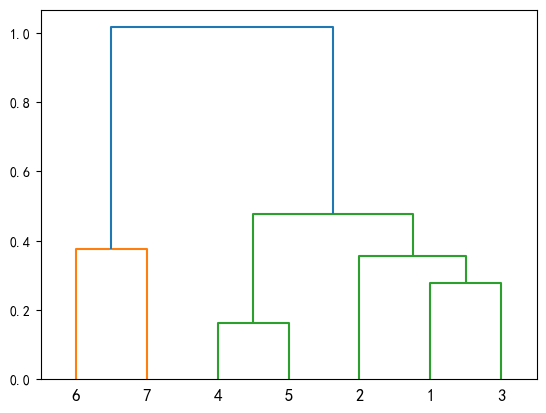

In [31]:
#最短距离法
import numpy as np 
from sklearn import preprocessing as pp
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示

skarn_data = np.array([
    [2.9909, 3.2044, 2.8392, 2.5315, 2.5897, 2.9600, 3.1184],  # Cu含量
    [0.3111, 0.5348, 0.5696, 0.4528, 0.3010, 3.0480, 2.8395],  # W含量
    [0.5324, 0.7718, 0.7614, 0.4893, 0.2735, 1.4997, 1.9850]   # Mo含量
])
b = pp.minmax_scale(skarn_data.T)
d = sch.distance.pdist(b)  

dd = sch.distance.squareform(d)


z = sch.linkage(d)
z_copy =z.copy()
z_copy[:,0:2]+=1
print(z_copy)
s = [str(i+1) for i in range(7)]   #注意这里后续肯定要改
sch.dendrogram (z, labels=s); plt.show() #画聚类图

[[ 4.          5.          0.16258132  2.        ]
 [ 1.          3.          0.27853564  2.        ]
 [ 2.          9.          0.35618248  3.        ]
 [ 6.          7.          0.37626539  2.        ]
 [ 8.         10.          0.47781458  5.        ]
 [11.         12.          1.01602914  7.        ]]


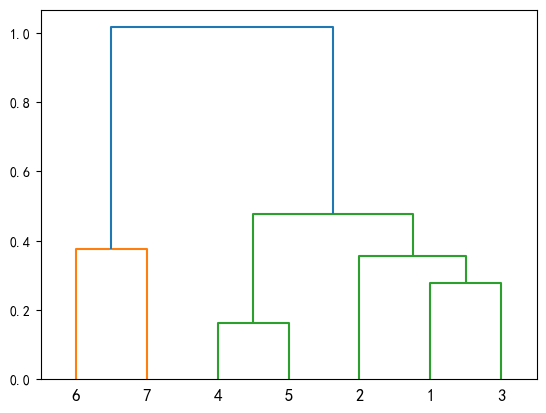

In [32]:
#最长距离法
import numpy as np
from sklearn import preprocessing as pp
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示

skarn_data = np.array([
    [2.9909, 3.2044, 2.8392, 2.5315, 2.5897, 2.9600, 3.1184],  # Cu含量
    [0.3111, 0.5348, 0.5696, 0.4528, 0.3010, 3.0480, 2.8395],  # W含量
    [0.5324, 0.7718, 0.7614, 0.4893, 0.2735, 1.4997, 1.9850]   # Mo含量
    ])
b = pp.minmax_scale(skarn_data.T)
d = sch.distance.pdist(b) 
z = sch.linkage(d)
z_copy =z.copy()
z_copy[:,0:2]+=1
print(z_copy)
s = [str(i+1) for i in range(7)]   #注意这里后续肯定要改
sch.dendrogram (z, labels=s); plt.show() #画聚类图

##### **K均值聚类**

In [81]:
import numpy as np
from sklearn.cluster import KMeans
a=np.array([[1, 3], [1.5, 3.2], [1.3, 2.8], [3, 1]])
md=KMeans(n_clusters=2)
md.fit(a) #求解模型
#构建模型
labels=1+md.labels_ #提取聚类标签
centers=md.cluster_centers_ #提取聚类中心,每一行是一个聚类中心
print (labels, '\n-----------\n',centers)

[2 2 2 1] 
-----------
 [[3.         1.        ]
 [1.26666667 3.        ]]


**K 均值聚类法最佳簇数值的确定**
* **簇內离差平方和拐点法**
* **轮廓系数法**